# **VODAFONE CORPORATION CUSTOMER CHURN PREDICTION**

#   **Business Understanding**

## Problem Statement

Telecommunication companies, such as Vodafone Corporation, face a significant challenge with customer churn, where customers cease using their services. To address this issue effectively, it's crucial to anticipate which customers are at risk of churning and implement proactive retention strategies. Leveraging machine learning models can provide a solution by predicting potential churners based on various factors, including usage patterns, payment history, and demographic data.

## Understanding Customer Attrition

Customer attrition, also known as churn or turnover, refers to the percentage of customers who stop using a company's product or service within a certain period.

For instance, if a company begins the year with 500 customers but ends with only 480, the churn rate is 4%. Predicting why and when customers leave can significantly help organizations strategize retention efforts.

## Project Goal

This project aims to:
- Determine the likelihood of customer churn based on certain characteristics such as gender
- Identify key indicators of churn
- Propose effective retention strategies to mitigate customer attrition.
- Train Classification Machine Learning algorithm to help predict the likelihood of a customer to churn

## Hypothesis

| Hypothesis Description                                                    |                                                                      |
|---------------------------------------------------------------------------|----------------------------------------------------------------------|
| Null Hypothesis (H0)                                                      | Customers with Month-to-Month contracts are equally likely to churn as those with one-year and two-year contracts.                  |
| Alternative Hypothesis (H1)                                               | Customers with Month-to-Month contracts are more likely to churn compared to those with one-year and two-year contracts.           |


## Analytical Questions

1. **From which contract do most churners originate?**
2. **Which gender exhibits the highest churn rate?**
3. **How does the number of lines a customer has influence churn?**
4. **Which internet service experiences the highest churn rate?**
5. **How does churn compare between customers with and without tech support?**
6. **Who churns more: customers with phone service or those without?**
7. **Who churns more: customers with paperless billing or those without?**
8. **During which tenures does churn occur most frequently?**


# **Data Understanding**


### Columns and their Descriptions

| Column            | Description                                                         |
|-------------------|---------------------------------------------------------------------|
| Gender            | Whether the customer is a male or a female                          |
| SeniorCitizen     | Whether a customer is a senior citizen or not                       |
| Partner           | Whether the customer has a partner or not (Yes, No)                 |
| Dependents        | Whether the customer has dependents or not (Yes, No)                |
| Tenure            | Number of months the customer has stayed with the company          |
| Phone Service     | Whether the customer has a phone service or not (Yes, No)           |
| MultipleLines     | Whether the customer has multiple lines or not                      |
| InternetService   | Customer's internet service provider (DSL, Fiber Optic, No)        |
| OnlineSecurity    | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup      | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection  | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport       | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV       | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies   | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract          | The contract term of the customer (Month-to-Month, One year, Two year) |
| PaperlessBilling  | Whether the customer has paperless billing or not (Yes, No)        |
| Payment Method    | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges    | The amount charged to the customer monthly                          |
| TotalCharges      | The total amount charged to the customer                            |
| Churn             | Whether the customer churned or not (Yes or No)                     |


## Data Loading

### Notes:
**Our dataset is stored in three separate areas**:
- Our first dataset is the first 3000 records of the dataset and will be found in a database we will have to access remotely
- The second part of the data is hosted on a GitHub Repository. The data is a csv file and we will have to download it
- The final 2000 records of the data set needed for this project will be found in OneDrive. The data is a csv file and we will have to download it. **This is the test dataset. This Dataset will be used for testing the accuracy of our models.**

In [9]:
# Import libraries
from dotenv import dotenv_values
import warnings
warnings.filterwarnings('ignore')
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [11]:
# Create a connection with the remote databse
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection = pyodbc.connect(connection_string)

In [12]:
# load first dataset
# Load database churn data from the database
churn_data1="SELECT * FROM dbo.LP2_Telco_churn_first_3000"
churn_data1=pd.read_sql(churn_data1,connection)

# Save database churn data to a csv file
'''file_name='churn_data1.csv'
churn_data1.to_csv(file_name,index=False)'''

"file_name='churn_data1.csv'\nchurn_data1.to_csv(file_name,index=False)"

In [13]:
# load second dataset from a GitHub Repository
# The data is saved in a csv file
churn_data2=pd.read_csv('Vodafone_Churn_data\LP2_Telco-churn-second-2000.csv')

In [14]:
# load the third dataset saved in OneDrive.
#The data is excel format
# This dataset will be used as the testing dataset
test_data=pd.read_excel('Vodafone_Churn_data\Telco-churn-last-2000.xlsx')

In [15]:
pd.set_option('display.max_columns',21) #Display maximum number of columns
churn_data1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [16]:
churn_data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [17]:
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


**Notes**:
- We will concatenate dataset 1 and  2 and the resulting dataframe will be our training dataset

In [18]:
# Concatenate dataset 1 and 2 to form the train dataset
train_data=pd.concat([churn_data1, churn_data2], ignore_index=True)
train_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


## Exploratory Data Analysis

In [19]:
# Get shape of the datasets
train_data.shape,test_data.shape

((5043, 21), (2000, 20))

In [20]:
# check train_data columns
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
test_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Notes:
- We will change the Columns to lowercase to make it easy working with them

In [22]:
# Function to change headers to lowercase
def data_columns_lower(data):
    data.columns = data.columns.str.lower()
    return data

In [23]:
# Change train columns to lowercase
data_columns_lower(train_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [24]:
# Change test data columns to lowercase
data_columns_lower(test_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [25]:
# Describe dataset
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,5043.0,NaN,NaN,NaN,0.162403,0.368857,0.0,0.0,0.0,0.0,1.0
partner,5043,4,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,5043,4,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
phoneservice,5043,4,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,4774,5,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,4392,5,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Check for nulls
# percentage of nulls
percent_nulls = pd.DataFrame((train_data.isnull().sum().sort_values(ascending=False) * 100) / len(train_data), columns=['Percent Nulls'])

# absolute nulls
nulls_abs = pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False), columns=['Numb'])

# combine in a df
nulls = pd.concat([percent_nulls, nulls_abs], axis=1)
nulls.reset_index(inplace=True)
nulls.rename(columns={'index': 'Column'}, inplace=True)

nulls

,Column,Percent Nulls,Nulls Absolute
0,onlinebackup,12.908983,651
1,onlinesecurity,12.908983,651
2,streamingmovies,12.908983,651
3,streamingtv,12.908983,651
4,techsupport,12.908983,651
5,deviceprotection,12.908983,651
6,multiplelines,5.334127,269
7,totalcharges,0.099147,5
8,churn,0.019829,1
9,internetservice,0.000000,0


In [44]:
# Check for duplicates
train_data.duplicated().sum()

0

In [45]:
train_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

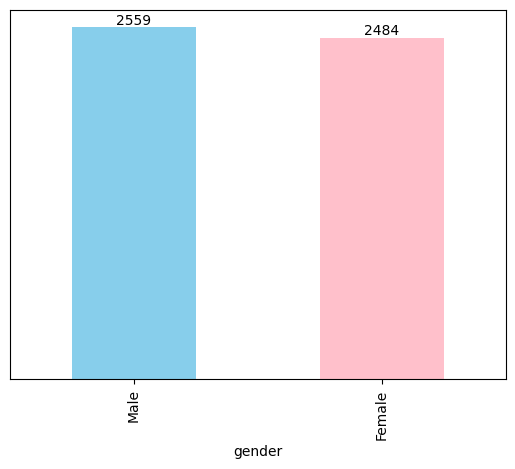

In [59]:
gender_bar=train_data['gender'].value_counts().plot.bar(color=['skyblue', 'pink'])
for i in gender_bar.containers:
    plt.bar_label(i,)
gender_bar.axes.get_yaxis().set_visible(False)
